# Data Exploration Report – Preventive Healthcare CHD Analysis

This notebook explores the cleaned heart disease dataset, examining relationships between lifestyle factors, health history, and 10-year CHD risk.  

Insights support the hypotheses:

- **H1:** Demographics, lifestyle, and health data predict disease risk.  
- **H2:** Visualizations help non-technical staff understand risk patterns.  
- **H3:** Predictive models can support preventive measures and reduce costs.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
sys.path.append(os.path.abspath("../src"))
from helper_functions import (
    show_boxplots, show_histograms, show_scatter_matrix,
    show_correlation_heatmap, show_grouped_histograms, show_binned_data
)

# Load Clean Data
df = pd.read_csv("../data/processed/heart_disease_clean_v2.csv")

# Define Column Groups
continuous_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
binary_cols = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


## 1. Summary Tables

### Continuous Variables
Summary statistics help identify central tendency, spread, and outliers. These insights indicate which variables may predict CHD risk.

### Binary Variables
Percentages show population prevalence for each binary factor. High-risk factors such as smoking or diabetes can be visually assessed for association with CHD.


In [13]:
# Continuous Variables Summary
summary_stats = df[continuous_cols].describe().T
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']
summary_stats

# Binary Variables Summary (% of population)
binary_summary = pd.DataFrame({col: df[col].value_counts(normalize=True) * 100 for col in binary_cols}).T
binary_summary


,0.0,1.0
male,57.075472,42.924528
currentSmoker,50.589623,49.410377
BPMeds,97.075472,2.924528
prevalentStroke,100.000000,NaN
prevalentHyp,68.938679,31.061321
diabetes,97.429245,2.570755
TenYearCHD,84.811321,15.188679


## 2. Boxplots

Boxplots show distribution and outliers for continuous variables. Variables like age, BMI, and blood pressure have higher medians in the CHD group, suggesting predictive value (supports H1).

- Age and cigarates per day seems well distributed.
- We see that cholesterol has some very high outliers.
- sysBP has a lot of very high outliers, the same goes for diaBP and BMI.
- HeartRate seems well distributed with a few outliers leaning to the higher side.
- Glucose has a wide range of outliers going from somewhat high to very high.


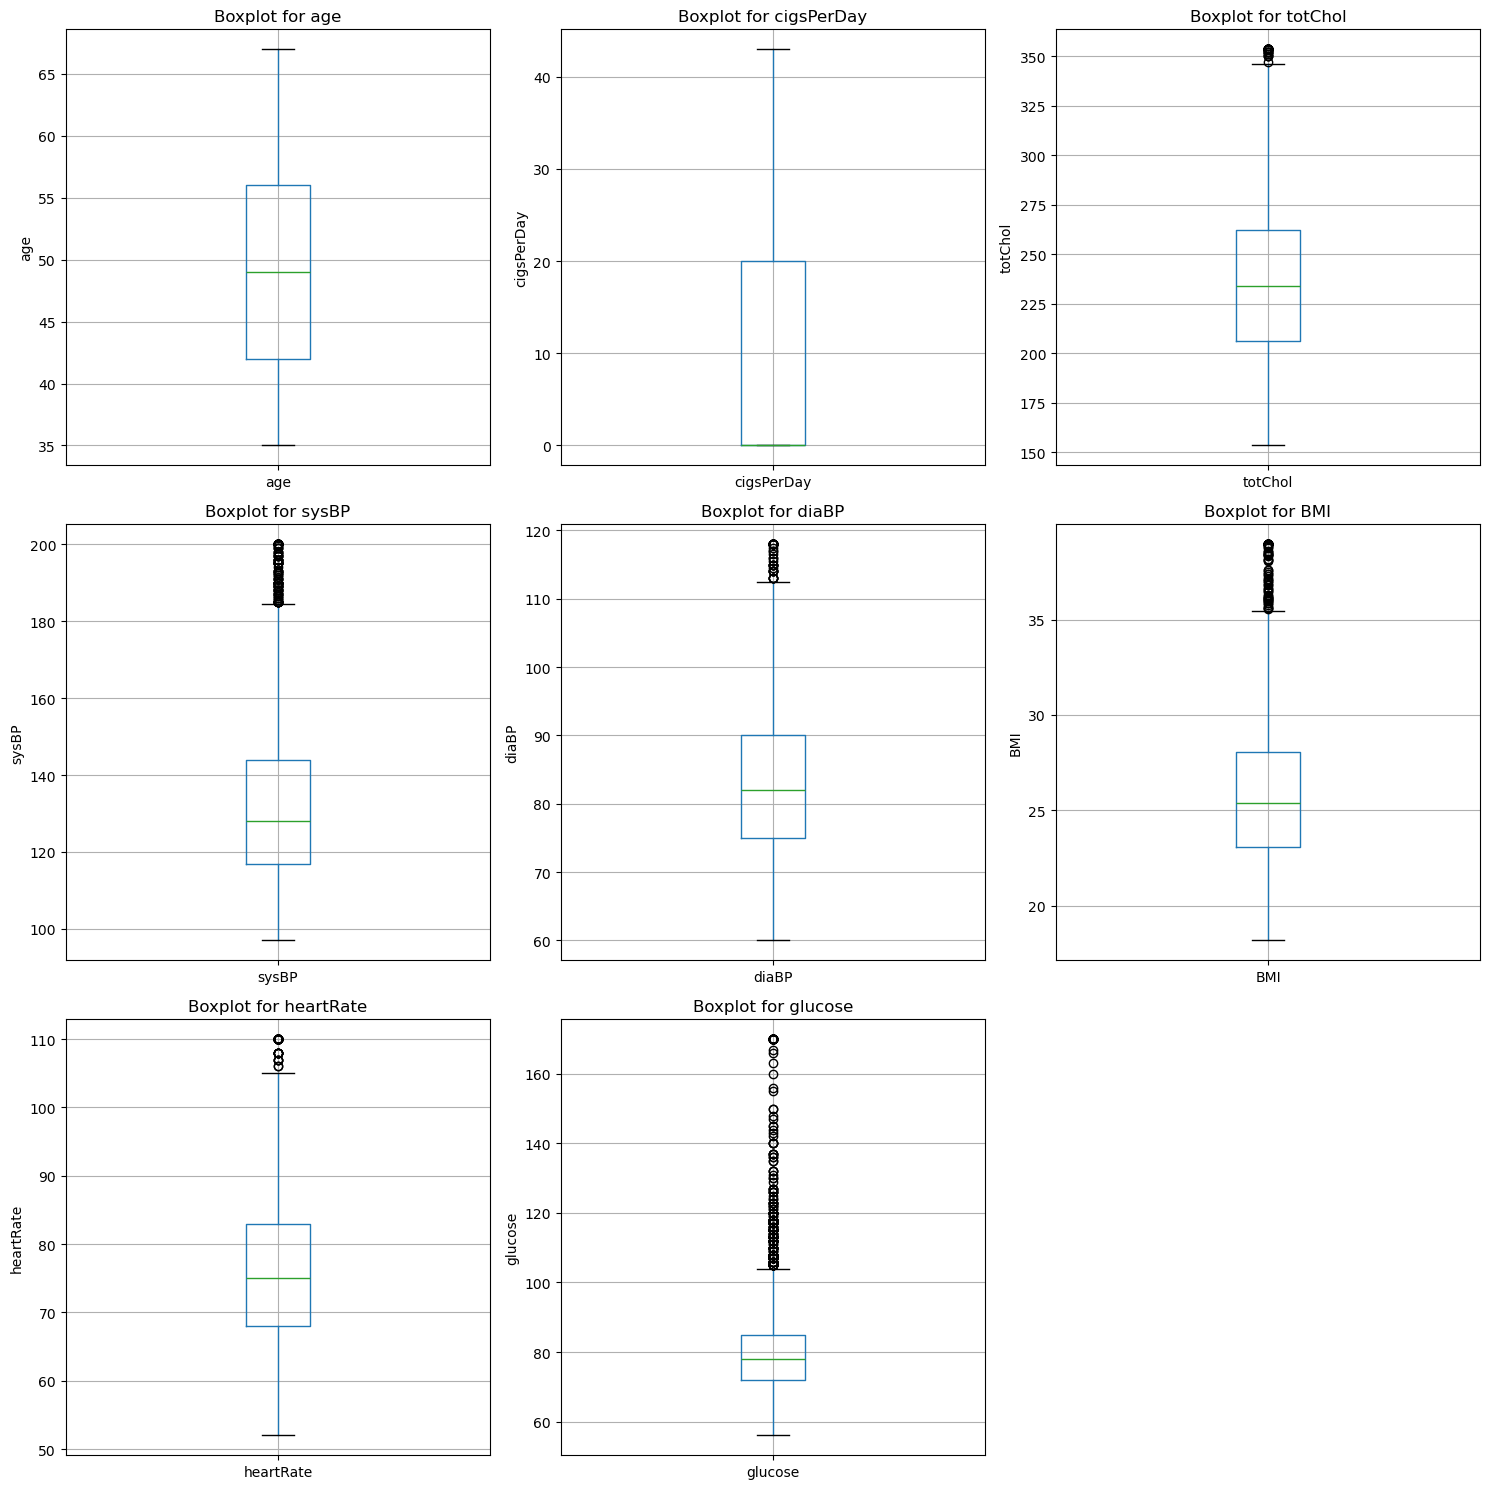

(<Figure size 1500x1500 with 9 Axes>,
 array([<Axes: title={'center': 'Boxplot for age'}, ylabel='age'>,
        <Axes: title={'center': 'Boxplot for cigsPerDay'}, ylabel='cigsPerDay'>,
        <Axes: title={'center': 'Boxplot for totChol'}, ylabel='totChol'>,
        <Axes: title={'center': 'Boxplot for sysBP'}, ylabel='sysBP'>,
        <Axes: title={'center': 'Boxplot for diaBP'}, ylabel='diaBP'>,
        <Axes: title={'center': 'Boxplot for BMI'}, ylabel='BMI'>,
        <Axes: title={'center': 'Boxplot for heartRate'}, ylabel='heartRate'>,
        <Axes: title={'center': 'Boxplot for glucose'}, ylabel='glucose'>,
        <Axes: >], dtype=object))

In [14]:
# Boxplots for continuous variables
show_boxplots(df[continuous_cols], layout="grid")


## 3. Histograms

Histograms reveal distribution skewness.

- We see that we have more younger patients than older, with a spike in the age group 50-52.
- We see that most smoking patients smoke 20 or less cigaretes per day.
- We see that cholesterol is noramlly distributed.
- We see that sysBP is a bit skewed due to a few high outliers.
- diaBP seems somewhat normally distributed, though with a sligth overweight of people having lower diaBP.
- BMI shows that most people are in the 23 - 27 category, which is close to a healthy weight. But we also see an surplus of overweight people in the dataset.
  


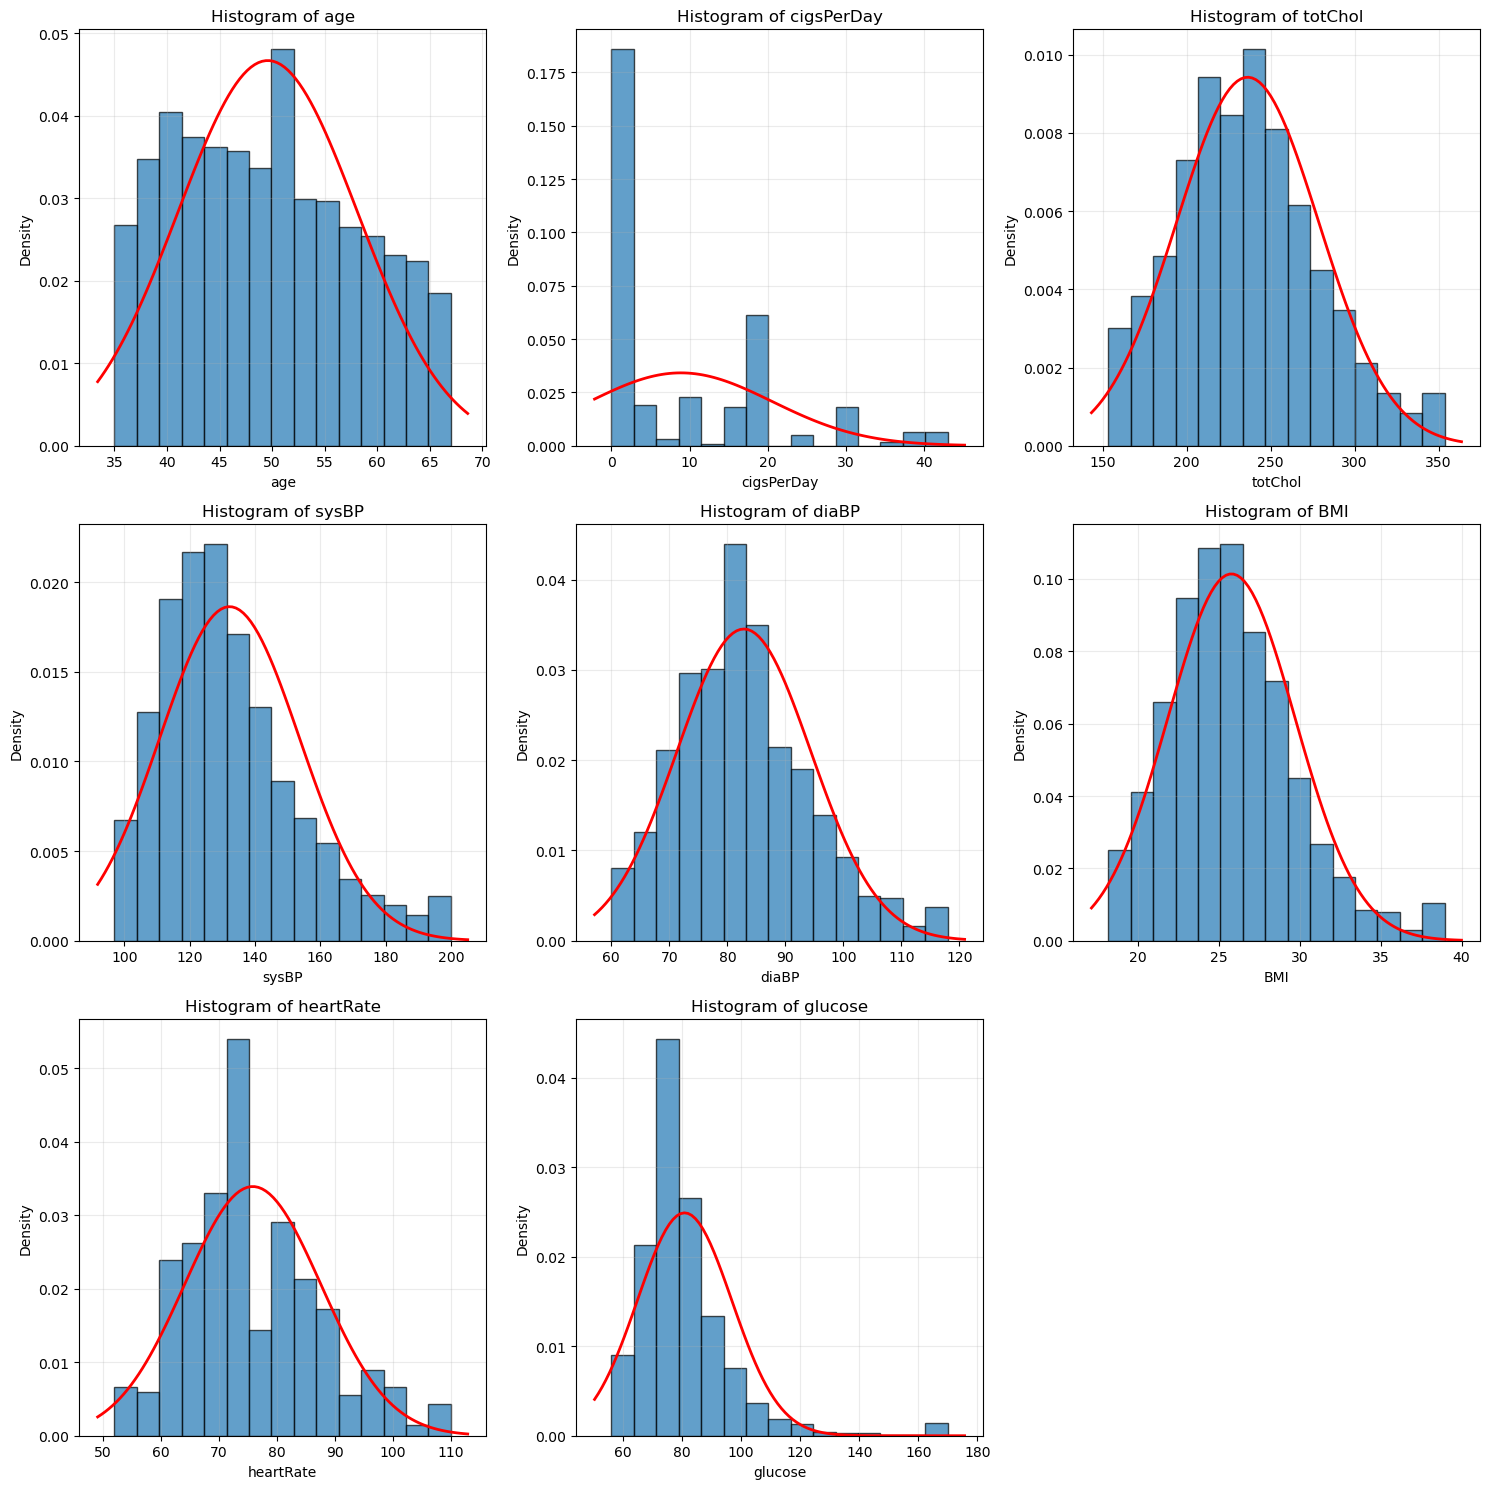

(<Figure size 1500x1500 with 9 Axes>,
 array([<Axes: title={'center': 'Histogram of age'}, xlabel='age', ylabel='Density'>,
        <Axes: title={'center': 'Histogram of cigsPerDay'}, xlabel='cigsPerDay', ylabel='Density'>,
        <Axes: title={'center': 'Histogram of totChol'}, xlabel='totChol', ylabel='Density'>,
        <Axes: title={'center': 'Histogram of sysBP'}, xlabel='sysBP', ylabel='Density'>,
        <Axes: title={'center': 'Histogram of diaBP'}, xlabel='diaBP', ylabel='Density'>,
        <Axes: title={'center': 'Histogram of BMI'}, xlabel='BMI', ylabel='Density'>,
        <Axes: title={'center': 'Histogram of heartRate'}, xlabel='heartRate', ylabel='Density'>,
        <Axes: title={'center': 'Histogram of glucose'}, xlabel='glucose', ylabel='Density'>,
        <Axes: >], dtype=object))

In [4]:
# Histograms for continuous variables
show_histograms(df[continuous_cols], bins=15, layout="grid", bell_curve=True)


## 4. Correlation Heatmap

Identifies which numeric variables are most strongly associated with CHD. 

- We see that diaBP and sysBP are the strongest indecators of TenYearCHD.
- Followed by sysBP and age.
- We also see that BMI and diaBP has some significance in TenYearCHD.
- So does BMI and sysBP.
  


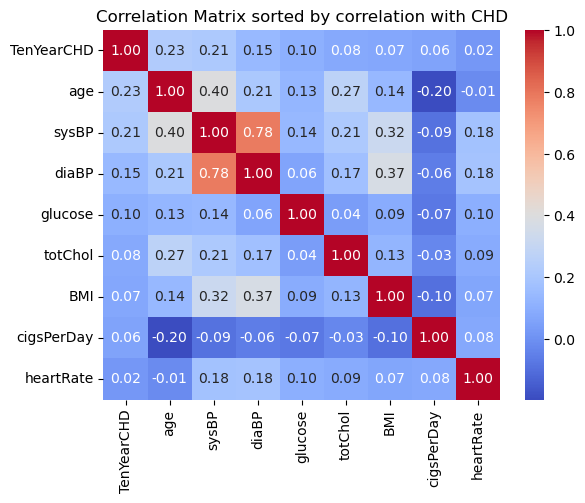

In [12]:
# Correlation Heatmap
corr = df[continuous_cols + ['TenYearCHD']].corr()['TenYearCHD'].sort_values(ascending=False)
sns.heatmap(df[continuous_cols + ['TenYearCHD']].corr().loc[corr.index, corr.index], annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix sorted by correlation with CHD')
plt.show()


## 5. Grouped Histograms by CHD

Grouped histograms show distribution differences for patients with and without CHD. Higher medians in CHD groups confirm predictive potential.

- We see that a higher percentage of older patients tend to get TenYearCHD, and that the chance of getting TenYearCHD rises with age.
- We see that a higher percentage of smoking patients tend to get TenYearCHD.
- Cholesterol also seems to slighty effect how likely patients are to suffer from TenYearCHD.
- sysBP shows strong correlation between high sysBP and high chance of TenYearCHD.
- diaBP shows correlation aswell.
- BMI shows us that underweight patients have slighty higher risk of getting TenYearCHD, than healthy patients. But we see the biggest impact on the overweight to very overweight category.
- HeartRate does not show any significant or noticeable correlation.
- Glucose strongly suggests that a high value equals much higher chance of TenYearCHD.


/Users/test/Desktop/BI/ExamProject/src/helper_functions.py:142: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pct_chd = df.groupby(bin_labels)[category_col].mean() * 100
/Users/test/Desktop/BI/ExamProject/src/helper_functions.py:151: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


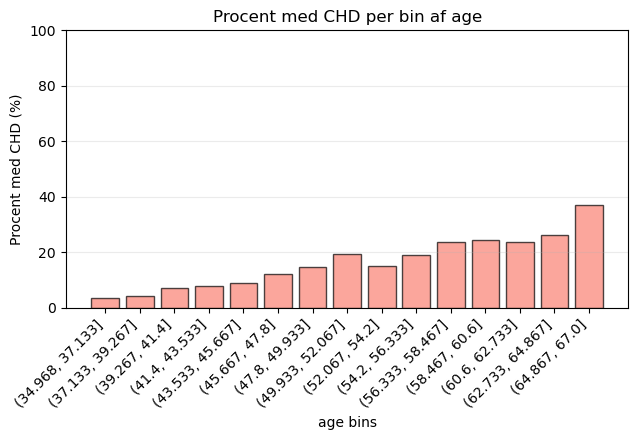

/Users/test/Desktop/BI/ExamProject/src/helper_functions.py:142: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pct_chd = df.groupby(bin_labels)[category_col].mean() * 100
/Users/test/Desktop/BI/ExamProject/src/helper_functions.py:151: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


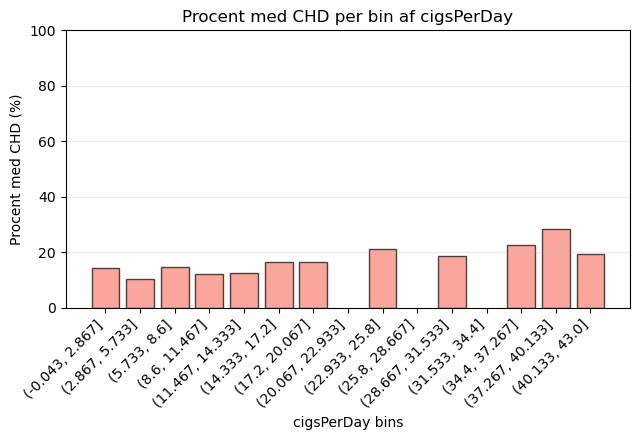

/Users/test/Desktop/BI/ExamProject/src/helper_functions.py:142: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pct_chd = df.groupby(bin_labels)[category_col].mean() * 100
/Users/test/Desktop/BI/ExamProject/src/helper_functions.py:151: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


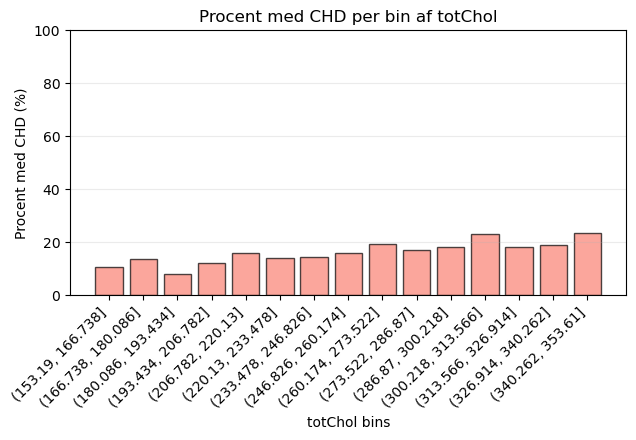

/Users/test/Desktop/BI/ExamProject/src/helper_functions.py:142: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pct_chd = df.groupby(bin_labels)[category_col].mean() * 100
/Users/test/Desktop/BI/ExamProject/src/helper_functions.py:151: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


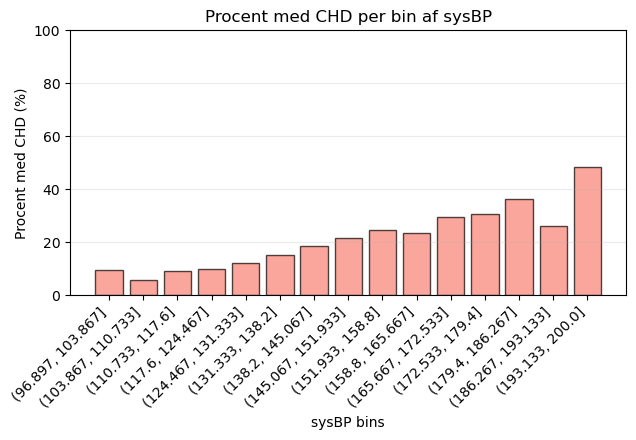

/Users/test/Desktop/BI/ExamProject/src/helper_functions.py:142: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pct_chd = df.groupby(bin_labels)[category_col].mean() * 100
/Users/test/Desktop/BI/ExamProject/src/helper_functions.py:151: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


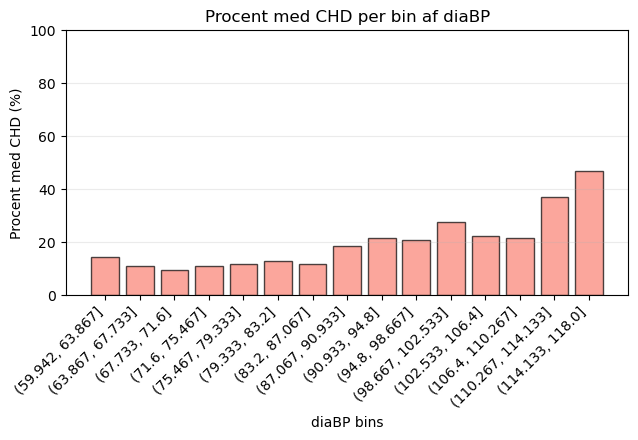

/Users/test/Desktop/BI/ExamProject/src/helper_functions.py:142: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pct_chd = df.groupby(bin_labels)[category_col].mean() * 100
/Users/test/Desktop/BI/ExamProject/src/helper_functions.py:151: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


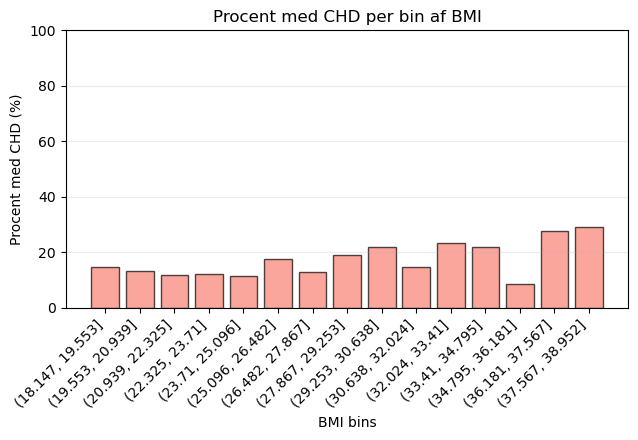

/Users/test/Desktop/BI/ExamProject/src/helper_functions.py:142: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pct_chd = df.groupby(bin_labels)[category_col].mean() * 100
/Users/test/Desktop/BI/ExamProject/src/helper_functions.py:151: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


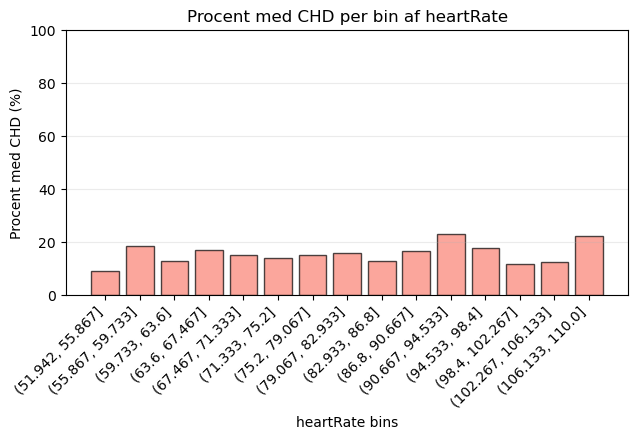

/Users/test/Desktop/BI/ExamProject/src/helper_functions.py:142: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pct_chd = df.groupby(bin_labels)[category_col].mean() * 100
/Users/test/Desktop/BI/ExamProject/src/helper_functions.py:151: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


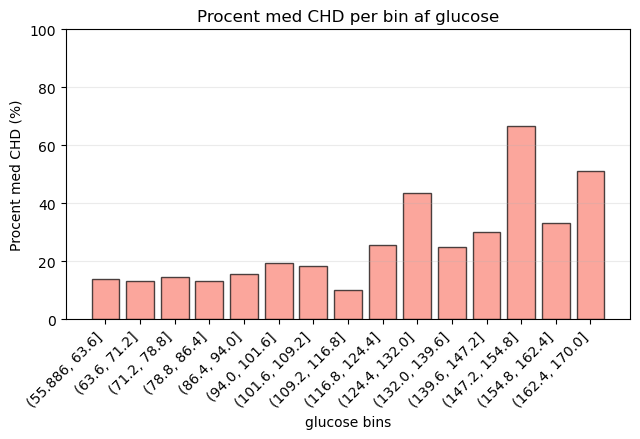

In [3]:
continuous_cols = [
    'age', 'cigsPerDay', 'totChol', 'sysBP', 
    'diaBP', 'BMI', 'heartRate', 'glucose'
]

for col in continuous_cols:
    show_grouped_histograms(df[[col, 'TenYearCHD']], bins=15, layout='separate')


## 6. Violin Plots by CHD

Violin plots combine boxplots and density plots, allowing us to visualize the distribution of continuous variables for patients with and without CHD.  

Observations:

- We see that age correlates with risk of getting TenYearCHD.
- Cigs per day also has a slight correlation. 
- Same with Cholesterol.
- SysBP shows clear correlation with chance of getting TenYearCHD.
- DiaBP also shows correlation.
- BMI does show correlation.
- So does HeartRate and Glucose.


/var/folders/51/b88m_0s92sgbb_58mhvtn7k00000gn/T/ipykernel_32592/1906493046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TenYearCHD', y=col, data=df, palette='Set2')


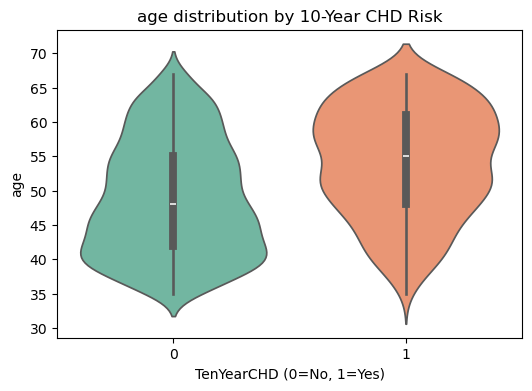

/var/folders/51/b88m_0s92sgbb_58mhvtn7k00000gn/T/ipykernel_32592/1906493046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TenYearCHD', y=col, data=df, palette='Set2')


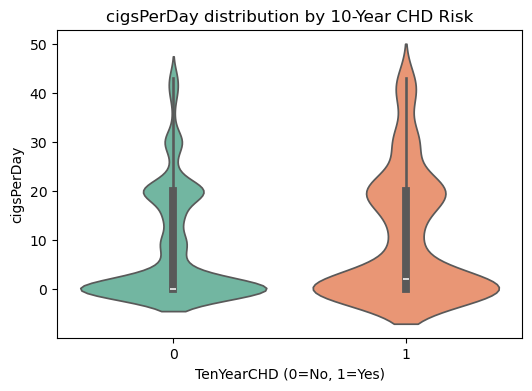

/var/folders/51/b88m_0s92sgbb_58mhvtn7k00000gn/T/ipykernel_32592/1906493046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TenYearCHD', y=col, data=df, palette='Set2')


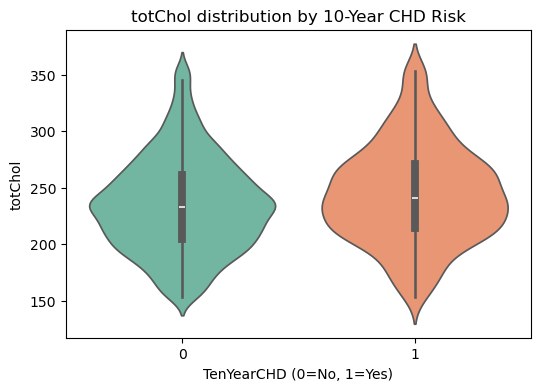

/var/folders/51/b88m_0s92sgbb_58mhvtn7k00000gn/T/ipykernel_32592/1906493046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TenYearCHD', y=col, data=df, palette='Set2')


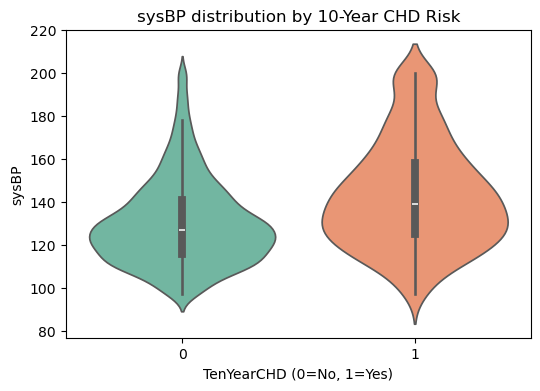

/var/folders/51/b88m_0s92sgbb_58mhvtn7k00000gn/T/ipykernel_32592/1906493046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TenYearCHD', y=col, data=df, palette='Set2')


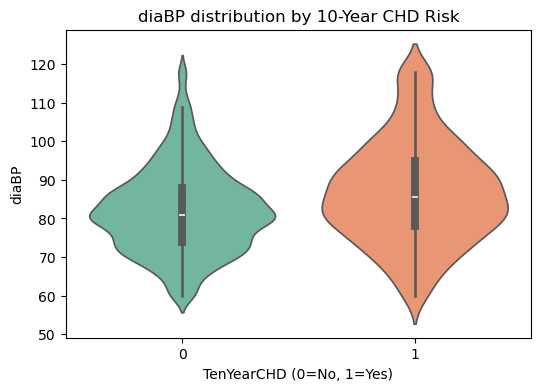

/var/folders/51/b88m_0s92sgbb_58mhvtn7k00000gn/T/ipykernel_32592/1906493046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TenYearCHD', y=col, data=df, palette='Set2')


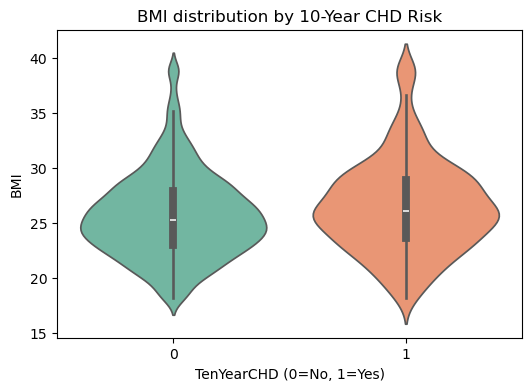

/var/folders/51/b88m_0s92sgbb_58mhvtn7k00000gn/T/ipykernel_32592/1906493046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TenYearCHD', y=col, data=df, palette='Set2')


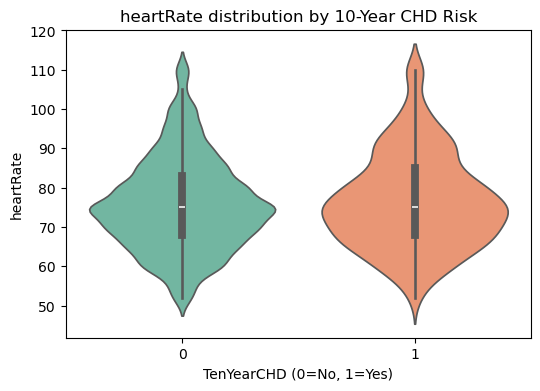

/var/folders/51/b88m_0s92sgbb_58mhvtn7k00000gn/T/ipykernel_32592/1906493046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TenYearCHD', y=col, data=df, palette='Set2')


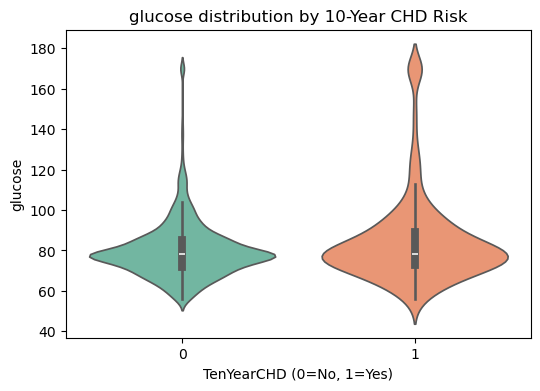

In [22]:
# Violin plots for continuous variables by TenYearCHD
for col in continuous_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='TenYearCHD', y=col, data=df, palette='Set2')
    plt.title(f'{col} distribution by 10-Year CHD Risk')
    plt.xlabel('TenYearCHD (0=No, 1=Yes)')
    plt.ylabel(col)
    plt.show()

## 7. Binary Variable Analysis

Count plots show the distribution of binary variables across the population.  

- Smoking, diabetes, and hypertension prevalence can be visually assessed.  
- Helps non-technical users understand risk patterns.
- We see that there are slighty more females in the dataset than males.
- There is an very slight overweight in non smokers in the dataset
- A very small part of the participants take any BPmeds
- Roughly one third has hypertension.
- Lastly, a small amount suffer from diabetes. 


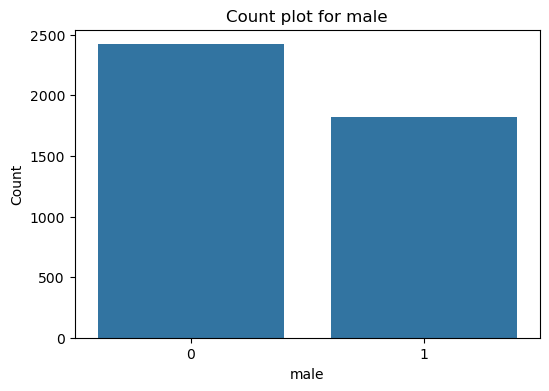

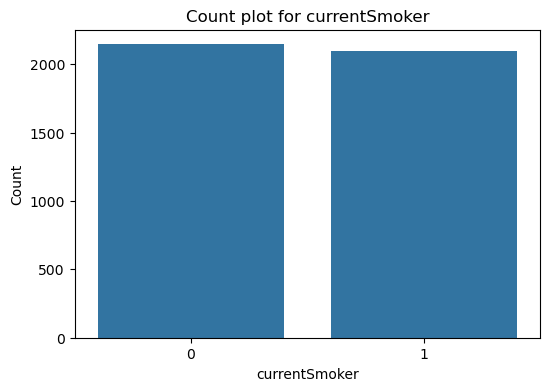

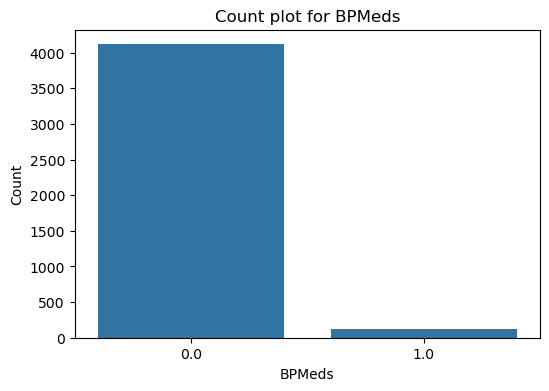

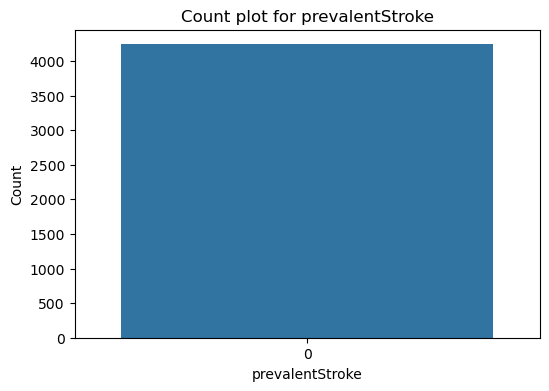

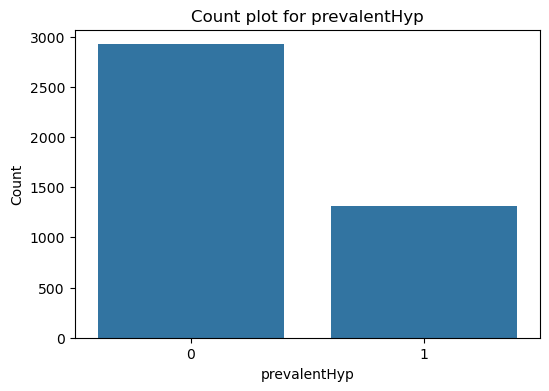

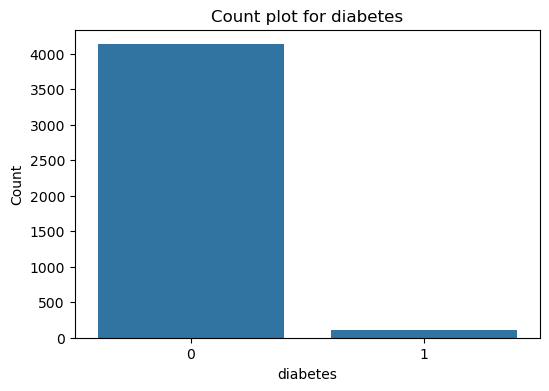

In [15]:
# Count plots for binary variables
for col in binary_cols[:-1]:  # Exclude TenYearCHD itself
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count plot for {col}')
    plt.ylabel('Count')
    plt.show()


## 8. Proportion of TenYearCHD per Binary Variable

Stacked bar plots show the probability of CHD for each category of binary variables.  

- This helps identify high-risk groups.  
- We see that males actually have a higher chance of getting CHD than females.
- Current smokers also have a slighty higher chance.
- People who are on BP meds, have a way higher chance of getting CHD, which implies that high blood pressure is an important risk factor.
- We see that patients with hypertension also has significant increased risk.
- Diabetes also increases the risk significantly.

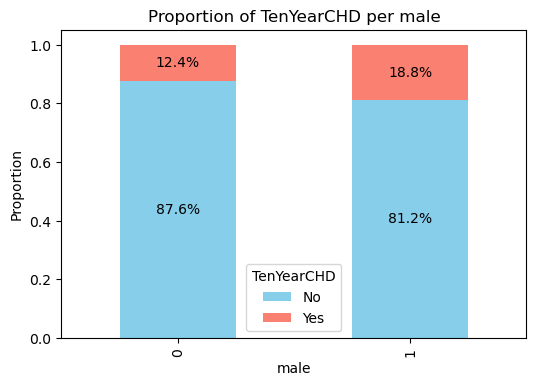

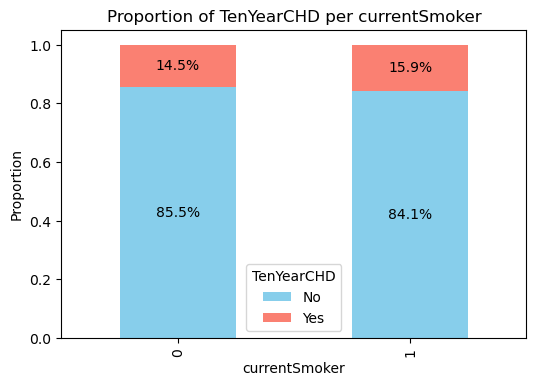

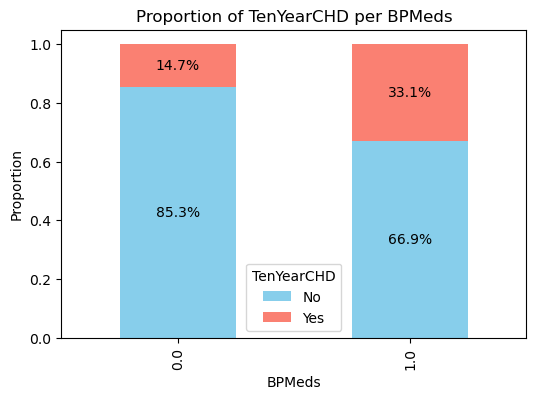

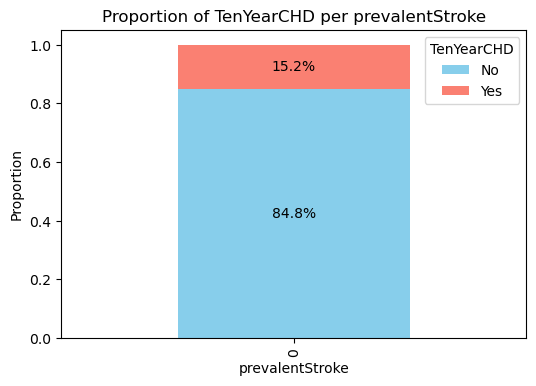

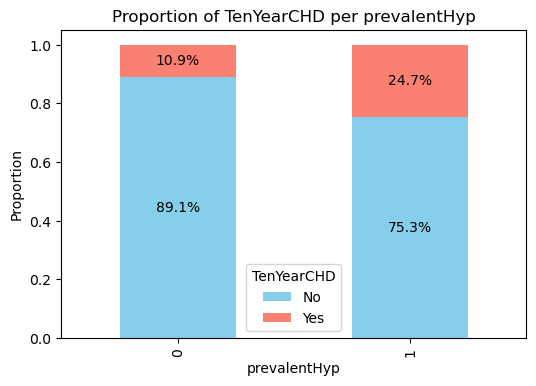

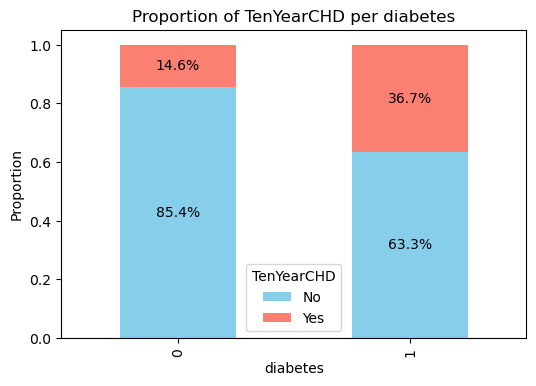

In [16]:
# Stacked bar plots for CHD proportions per binary variable
for binary_col in binary_cols[:-1]:
    cross = pd.crosstab(df[binary_col], df['TenYearCHD'], normalize='index')
    ax = cross.plot(kind='bar', stacked=True, figsize=(6,4), color=['skyblue', 'salmon'])
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.text(x + width/2, y + height/2, f'{height*100:.1f}%', ha='center', va='center', fontsize=10, color='black')
    plt.title(f'Proportion of TenYearCHD per {binary_col}')
    plt.ylabel('Proportion')
    plt.xlabel(binary_col)
    plt.legend(title='TenYearCHD', labels=['No', 'Yes'])
    plt.show()


## 9. Binned Data Analysis

Binned data analysis shows how one variable changes across ranges of another.  

Example: TenYearCHD vs. Age bins  
-  

- We clearly see that risk of TenYearCHD significantly goes up as you age.
- We see the same when we make a bin with BMI, the higher the BMI the higher the chance of getting CHD.
- Prevalent Hypertension seems to be the second biggest risk factor, with it present, the patients go from rougly 1.1% having TenYearCHD, to almost 2.5%.
- The only risk factor seemingly more significant than Hypertension is diabetes, as TenYearCHD rises from roughly 1.4% to 3.7%.

/Users/test/Desktop/BI/ExamProject/src/helper_functions.py:197: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_vals = binned_df.groupby('bin')[column_to_plot].mean()


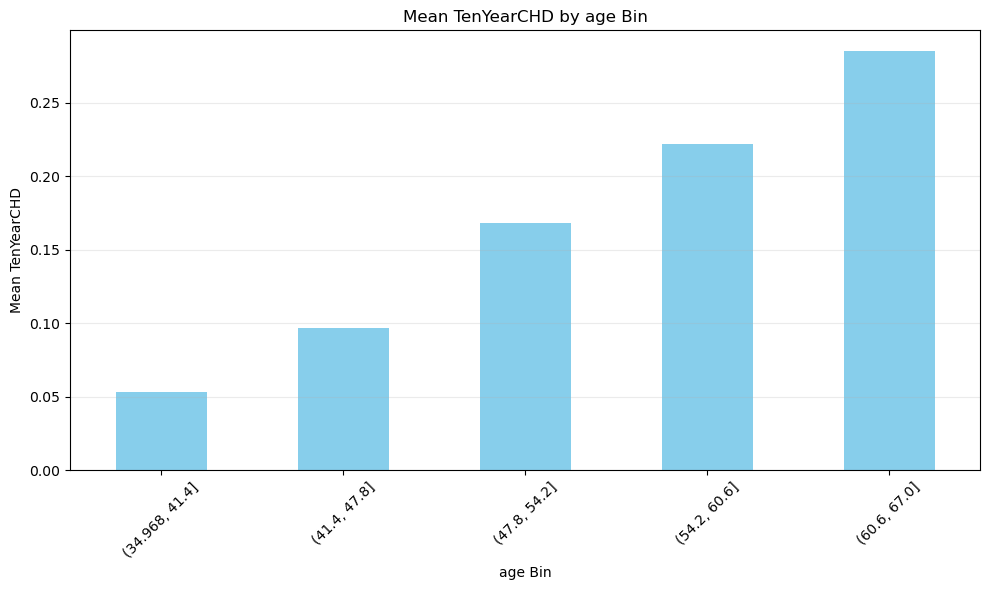

/Users/test/Desktop/BI/ExamProject/src/helper_functions.py:197: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_vals = binned_df.groupby('bin')[column_to_plot].mean()


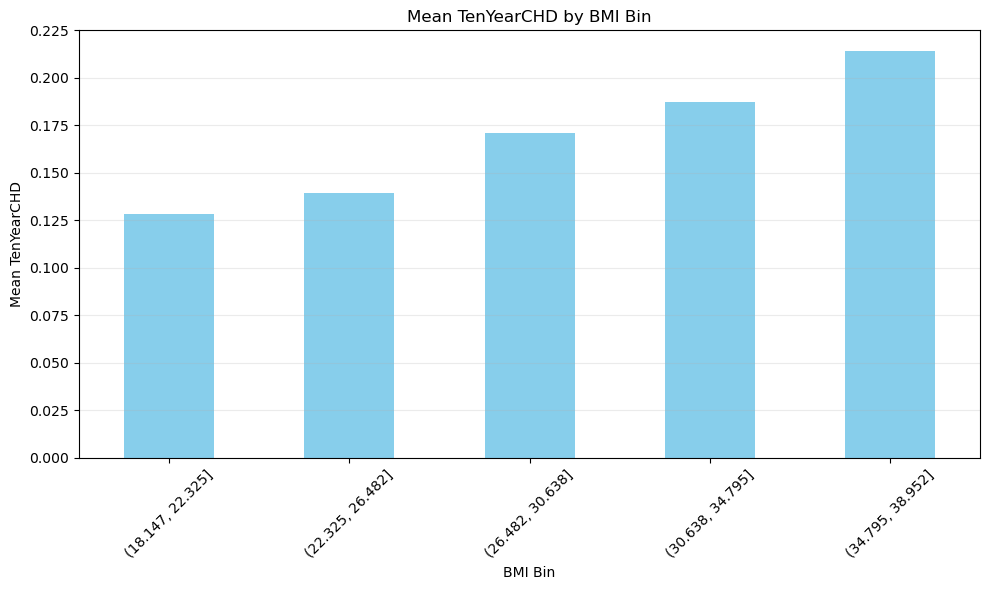

/Users/test/Desktop/BI/ExamProject/src/helper_functions.py:197: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_vals = binned_df.groupby('bin')[column_to_plot].mean()


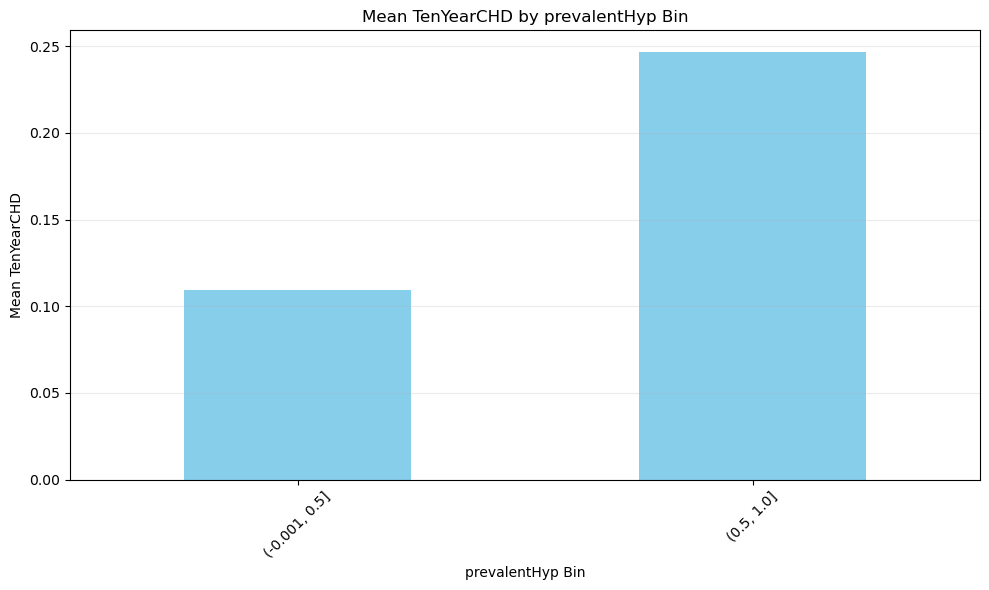

/Users/test/Desktop/BI/ExamProject/src/helper_functions.py:197: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_vals = binned_df.groupby('bin')[column_to_plot].mean()


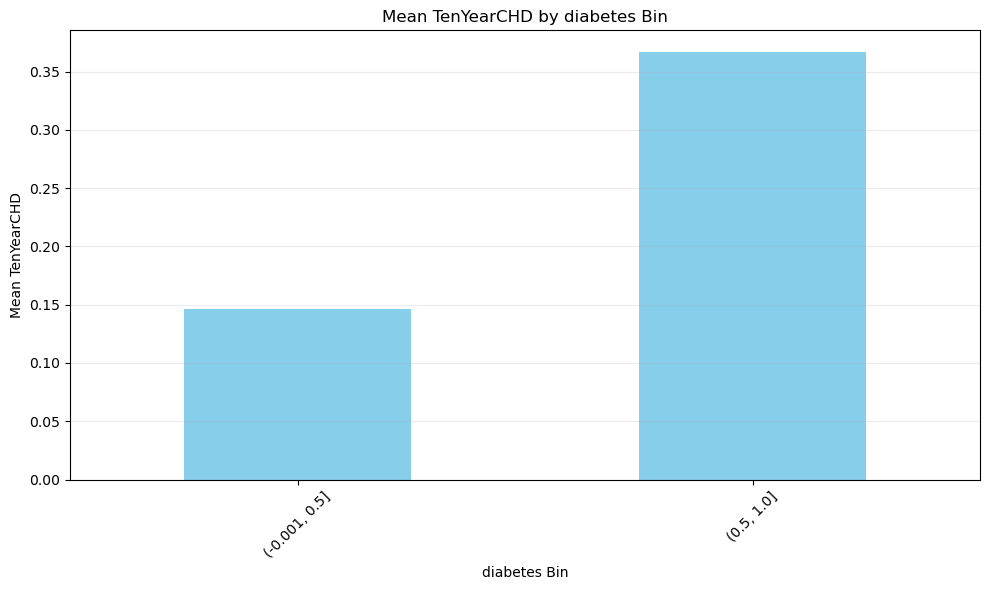

bin
(-0.001, 0.5]    0.146212
(0.5, 1.0]       0.366972
Name: TenYearCHD, dtype: float64

In [20]:
# Binned data example: BMI by age
show_binned_data(df, column_to_bin='age', column_to_plot='TenYearCHD', bins=5, aggregation_method='mean')
show_binned_data(df, column_to_bin='BMI', column_to_plot='TenYearCHD', bins=5, aggregation_method='mean')
show_binned_data(df, column_to_bin='prevalentHyp', column_to_plot='TenYearCHD', bins=2, aggregation_method='mean')
show_binned_data(df, column_to_bin='diabetes', column_to_plot='TenYearCHD', bins=2, aggregation_method='mean')



# Research Questions

## 1. How can Business Intelligence and Machine Learning be applied to analyze patient health and lifestyle data for preventive purposes?

- **Business Intelligence:**  
  - Visualizations such as boxplots, histograms, violin plots, and heatmaps provide insights into key variables like age, BMI, blood pressure, glucose, and smoking behavior.  
  - Grouped visualizations help healthcare staff identify high-risk patient groups.  
  - Binned analyses (e.g., TenYearCHD by BMI) support planning and monitoring of preventive interventions.  

- **Machine Learning:**  
  - Classification models can be trained with `TenYearCHD` as the target variable.  
  - Models identify high-risk patients based on combinations of factors and provide quantifiable risk. 
  - Integration into dashboards allows real-time insights into patient risk.

---

## 2. Which factors are most predictive of lifestyle-related disease risk?

- **Key predictive factors identified:**  
  - **Age** – older patients have higher CHD risk.
  - **BPmeds** – Patients who take BPmeds have a higher risk of CHD.  
  - **BMI** – higher BMI correlates with higher risk.  
  - **Blood Pressure (sysBP, diaBP)** – elevated in patients with CHD.  
  - **Glucose** – higher levels in CHD patients.  
  - **Smoking behavior** (currentSmoker, cigsPerDay).
  - **Diabetes** – Having diabetes strongly increases risk of CHD.
  - **Cholesterol/Hypertension** – higher levels in CHD patients.


**Conclusion:** Every metric we've looked into correlates with higher risk of CHD, but the most predictive factors seem to be blood pressure medicin, blood pressure, diabetes and hypertension. We see a very strong correlation with these metrics.

---

## 3. How can predictive models be integrated into a usable BI solution for healthcare providers?

- **Integration steps:**  
  1. **Data preprocessing:** Clean data, normalize variables, handle missing values.  
  2. **Model training:** Train ML models using `TenYearCHD` as the target.  
  3. **Risk scoring:** Compute probability of CHD for each patient.  
  4. **Visualization:** Incorporate results into dashboards:  
     - Heatmaps showing risk by factor.  
     - Grouped histograms and violin plots for risk categories.  
     - Scorecards or color-coded risk levels (high, medium, low).  
  5. **Intervention support:** Healthcare staff can prioritize preventive measures based on risk scores. 

**Conclusion:** Integrating predictive models into BI dashboards provides actionable insights for early intervention and prevention.

---

# Assessment of Hypotheses

## H1: Combination of demographic, lifestyle, and health data predicts increased risk of lifestyle-related diseases
 
- Random Forest and Logistic Regression models utilize all features.  
- Metrics (ROC AUC, Accuracy, Precision, Recall, F1) show that high-risk patients can be identified.  
- Feature importance and EDA confirm that demographic, lifestyle, and health factors contribute to CHD risk.

## H2: Visualizations and dashboards help healthcare staff understand risk patterns

- The Streamlit dashboard provides:  
  - Correlation matrices  
  - Histograms and boxplots  
  - Interactive binned analysis  
  - Clustering with average CHD risk per cluster  
- Dashboard provides an interactive BI tool for pattern discovery and high-risk group identification.

## H3: Predictive models support early interventions and reduce treatment costs

- The dashboard allows:  
  - Individual patient predictions with adjustable risk thresholds  
  - Visualization of predicted CHD probability  
- Enables early identification of high-risk patients and preventive actions.  
- Direct evidence of reduced treatment costs requires longitudinal data or workflow integration, which is not yet implemented.

---

### Evaluation of Predictive Models – Sprint 3: Data Modelling

#### 1. Overview
In Sprint 3, we applied predictive analytics to the heart disease dataset using supervised machine learning. The goal was to:

1. Select appropriate algorithms for prediction.  
2. Train and validate models on training/test splits and cross-validation.  
3. Evaluate models using inference measures (accuracy, precision, recall, F1, ROC AUC).  
4. Explore improvements via hyperparameter tuning.  

We implemented **Logistic Regression** and **Random Forest**, and performed **GridSearchCV tuning** on the Random Forest.

---

#### 2. Model Comparison

| Model                | CV ROC AUC | Test ROC AUC | Accuracy | Precision | Recall  | F1-Score |
|---------------------|------------|--------------|----------|-----------|---------|----------|
| Logistic Regression  | 0.681      | 0.629        | 0.304    | 0.170     | 0.922   | 0.287    |
| Random Forest        | 0.679      | 0.622        | 0.459    | 0.190     | 0.783   | 0.306    |
| Tuned Random Forest  | 0.702 (CV) | 0.662        | 0.216    | 0.158     | 0.961   | 0.272    |

**Key Observations:**

- **CV ROC AUC** values (~0.68–0.70) indicate **moderate predictive performance**, suggesting models can distinguish CHD vs. non-CHD patients better than random guessing.
- **Accuracy** is low across models due to **class imbalance** (few patients develop CHD). Accuracy alone is not a reliable metric here.
- **Precision** is low, especially for the tuned Random Forest, meaning many flagged high-risk patients are false positives.
- **Recall** is high, particularly for the tuned Random Forest (0.961), which is desirable in preventive healthcare to **capture almost all true CHD cases**.
- **F1-Score** balances precision and recall, showing the trade-off between avoiding false positives and detecting true positives.

---

#### 3. Interpretation of Tuning Effects
The tuned Random Forest had the following best hyperparameters:

```python
{'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}

